(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Bias and Varience

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# the physical law says: S = 1/2 * F / M * t*2
# S: displacement, M: mass, F: force
# Let's say we know nothing about physics
# Given this data measure points: 
# (t, S) for N points, we want to predict for (t_new) what is S_new

In [4]:
ground_truth_coef = 1./2 * 10 / 2
t = np.random.random(10) * 3
ground_truth_result = ground_truth_coef * t**2

# measure error
measure_result = ground_truth_result + np.random.randn(10)*2

t_new = np.random.random(5) * 3

In [5]:
from sklearn import linear_model, metrics
lm_lr = linear_model.LinearRegression()

In [6]:
# Under fitting, what is the error? (using 1 order)
# we need to run it over multiple times to see the difference
N = 10000
error = []
error_train = []
for i in range(N):
    #generate training data 
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2  #generate the y value in training data
    t.resize([len(t), 1]) #resize to put it in a metrics
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5) * 3).reshape(-1, 1)
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t, measure_result))
    
error = np.array(error)
#error_train = np.array(error_train)

In [7]:
#print error_train.mean(), error_train.std()
print (error.mean(), error.std())

4.94384862058 5.27729829705


In [8]:
# Over fitting, what is the error? (using 3 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2, t**3])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2, t_new**3])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t[:,0], measure_result))

    
error = np.array(error)
#error_train = np.array(error_train)

In [9]:
print (error.mean(), error.std())
#error.mean() = total error(MSE) = Bias + Variance
#error.std() = Variance
#MSE - Variance = Bias

25.4858630509 359.887528155


In [10]:
# Over fitting, what is the error? (using 2 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    
error = np.array(error)

In [11]:
print(error.mean(), error.std())

3.6268488088 42.3722214152


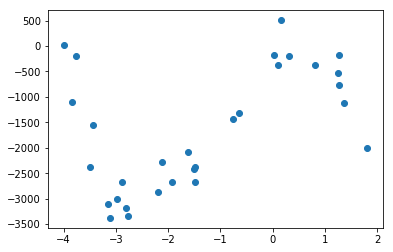

In [12]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

In [13]:
# Q1. Under ALL circumstances, is it that the more complicated a model is, the lower training error? 
# Q2. Under ALL circumstances, is it that the more complicated a model is, the lower testing error? 
# Q3. How does standard deviation looks like for both training & testing errors

In [14]:
# Q1:Yes
# Q2:No. For test error, it goes down first and then up later
# Q3:Not sure. Standard diviation of training errors goes down as the model complexity goes up

## Bias & varience: model complexity

In [15]:
# single variable linear model (low varience)
# nearest-neighbour model (high varience) 

In [16]:
# Q. Is single linear regression model high bias, low varience? 
# A. It depends on the real problem itself. Mostly linear regression has high bias and low variance. 
# But for the circular model, it has high variance

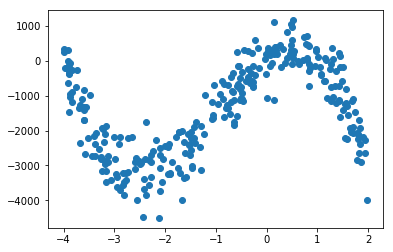

In [17]:
# Data set 1. 
N = 300
np.random.seed(1)
x = (np.random.random([N, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

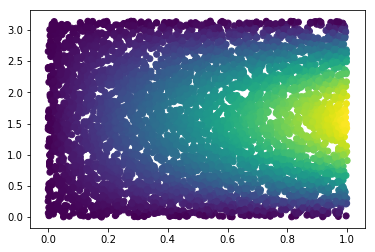

In [18]:
# Data set 2. 
N = 5000
r = np.random.rand(N)
theta = np.random.rand(N) * 1.0 * np.pi
y = np.sin(theta) * r
plt.scatter(r, theta, c=y)

If a model has high bias and low variance, that means the complexity of model cannot explain the real hidden mechanism. Add variables to get a better model.
<p>If a model has high variance and low bias, we need to reduce the variance. Common methods: 1. reduce number of variables(feature selection); 2. Regularazation(add one term to avoid overfitting)

## Bias & varience: data size

In [19]:
# When the data size is large enough, you don't need to care much about the variance and complexity

In [20]:
from sklearn import datasets, cross_validation
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100, noise=100)
X = data[0]
Y = data[1]
print (X.shape, Y.shape)

(1000, 100) (1000,)


/Users/jyguo/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
ts_range = np.arange(0.05, 1, 0.05)
N_run = 50
t_score = []
v_score = []
for train_s in ts_range:
    t_score.append([])
    v_score.append([])
    for iseed in range(N_run):
        X1, X2, Y1, Y2 = cross_validation.train_test_split(X, Y, train_size=train_s, random_state=iseed)
        rlm = linear_model.LinearRegression()
        rlm.fit(X1, Y1)
        t_score[-1].append(metrics.r2_score(Y1, rlm.predict(X1)))
        v_score[-1].append(metrics.r2_score(Y2, rlm.predict(X2)))
    # print train_s

In [22]:
t_score = np.array(t_score)
v_score = np.array(v_score)

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


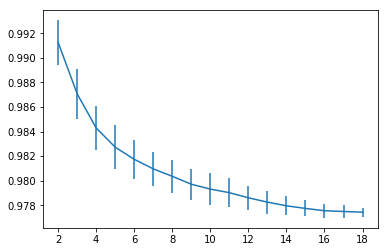

In [23]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
fig.show()

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


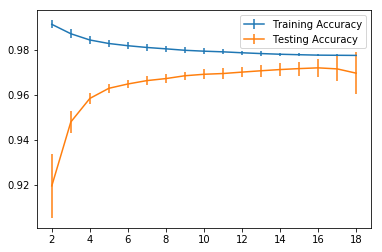

In [24]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s, label = "Training Accuracy")
x = range(v_score.shape[0])[2:]
y = v_score.mean(axis=1)[2:]
s = v_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s, label = "Testing Accuracy")
plt.legend()
fig.show()

In [25]:
# When the data size grow larger, the impact of variance becomes small and the testing accuracy is close to training's

# Regression in-depth

In [26]:
# Regular linear regression

# Lasso

# Ridge

# Elastic-net

## Regularization

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


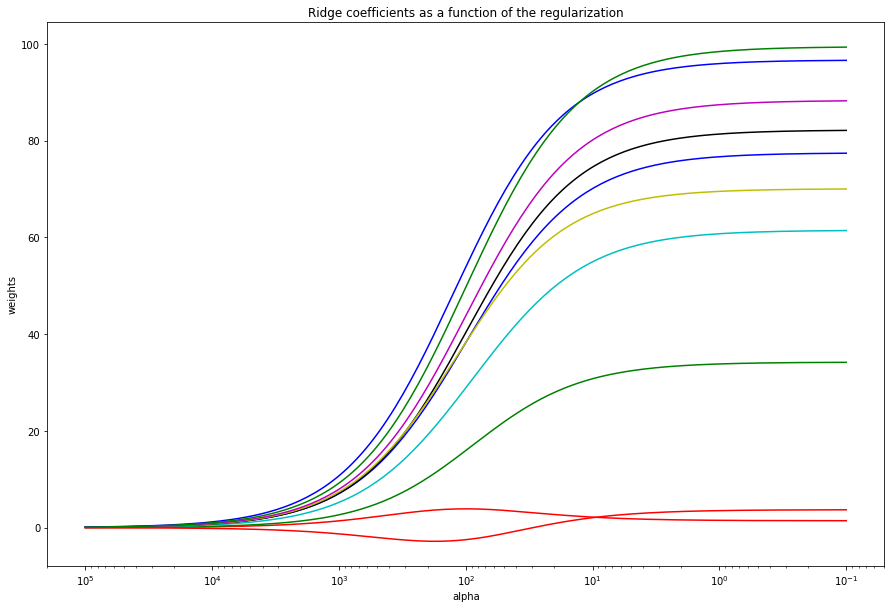

In [27]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
data = datasets.make_regression(n_samples=100, n_features=10, n_informative=10, random_state=0)

X = data[0]
y = data[1]

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize = (15,10))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


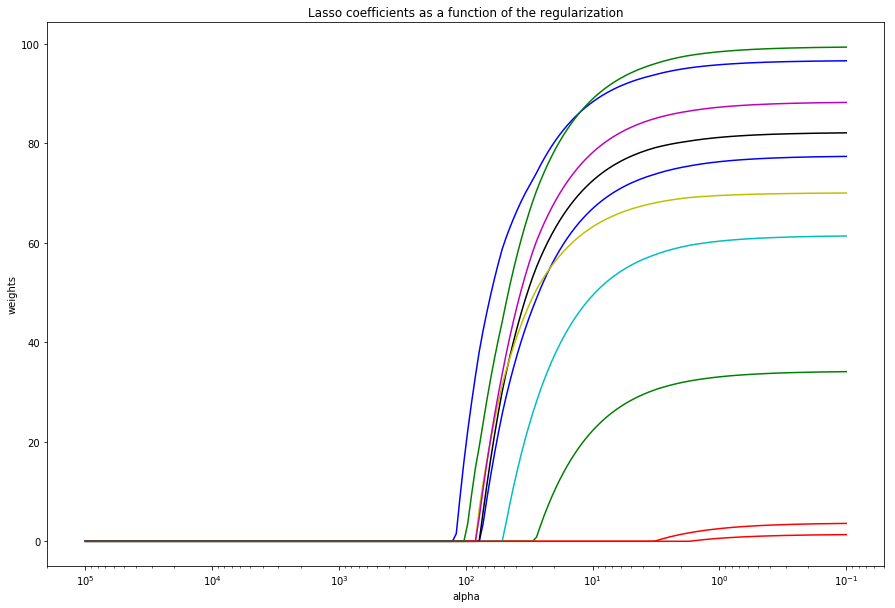

In [28]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Lasso()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize = (15,10))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

/Users/jyguo/miniconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


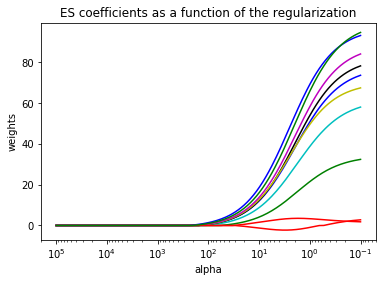

In [29]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.ElasticNet(l1_ratio=0.5)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ES coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [30]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_friedman1(random_state=0)
X = data[0]
y = data[1]

## Stochastic gradient descent (SGD)

In [31]:
# http://vis.supstat.com/2013/03/gradient-descent-algorithm-with-r/
# 

In [32]:
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100)
X = data[0]
y = data[1]

In [33]:
# compare efficiency and accuracy for SGD and tradition LR

In [34]:
%%time
lrg1 = linear_model.LinearRegression()
lrg1.fit(X, y)

CPU times: user 8.15 ms, sys: 1.51 ms, total: 9.66 ms
Wall time: 6.26 ms


In [35]:
%%time
lrg2 = linear_model.SGDRegressor()
lrg2.fit(X,y)

CPU times: user 9.87 ms, sys: 2.48 ms, total: 12.3 ms
Wall time: 7.42 ms


/Users/jyguo/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


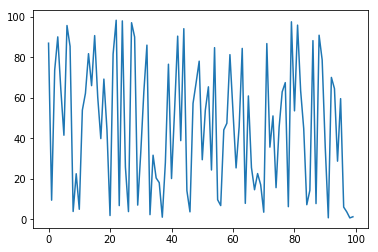

In [36]:
plt.plot(lrg1.coef_)

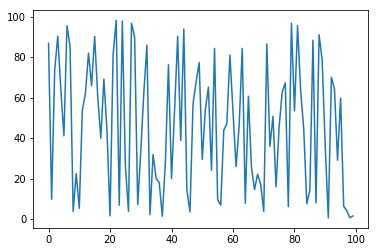

In [37]:
plt.plot(lrg2.coef_)

## Preprocessing

In [38]:
from sklearn import preprocessing

In [39]:
X, Y = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2)

In [40]:
X1 = X
X2 = X.copy()
X2[:,1] *= 1000

In [41]:
from sklearn import linear_model

In [42]:
m1 = linear_model.LinearRegression()
m1.fit(X1, Y)

m2 = linear_model.LinearRegression()
m2.fit(X2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
m1.coef_

array([ 68.465698  ,  18.43558471])

In [44]:
m2.coef_

array([  6.84656980e+01,   1.84355847e-02])

In [45]:
m1 = linear_model.SGDRegressor()
m1.fit(X1, Y)

m2 = linear_model.SGDRegressor()
m2.fit(X2, Y)

/Users/jyguo/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [46]:
m1.coef_, m1.intercept_

(array([ 68.44728616,  18.4176009 ]), array([-0.00205073]))

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_squared_error(m1.predict(X1), Y)

0.00066612989967062511

In [49]:
m2.coef_, m2.intercept_

(array([  2.83978664e+10,  -6.80127180e+11]), array([ -1.10894825e+11]))

In [50]:
metrics.mean_squared_error(m2.predict(X2), Y)

4.6131320059977153e+29

## Robustness regression

In [51]:
# Why robustness is needed?

x = np.random.random(100) * 10 
y = 2.0 * x + 30 + 2.0 * np.random.rand(len(x))

xn = np.random.random(10) * 3
yn = 6.0 * xn + 4 + 2.0 * np.random.rand(len(xn))

xnew = np.concatenate([x,xn])
ynew = np.concatenate([y,yn])

xnew = xnew.reshape([-1,1])

In [52]:
# RANSAC
# https://upload.wikimedia.org/wikipedia/commons/c/c0/RANSAC_LINIE_Animiert.gif